# Proyek Analisis Data: Bike Sharing
- **Nama:** Syafiq Ziyadul Arifin
- **Email:** szarifin20041@gmail.com
- **ID Dicoding:** safiq53

## Menentukan Pertanyaan Bisnis

- Bagaimana persebaran jumlah penyewa sepeda di berbagai kondisi cuaca?
- Bagaimana pengaruh musim terhadap jumlah penyewa sepeda, baik yang kasual, terdaftar, maupun total keduanya?
- Bagaimana hubungan antara temperatur dan jumlah penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

Import semua packages/library yang dibutuhkan/digunakan

In [790]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle

## Data Wrangling

### Gathering Data

Import data

In [791]:
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

Tampilkan 5 row pertama

In [792]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [793]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Mencari apakah ada data yang kosong

In [794]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [795]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mencari apakah ada data yang duplikat

In [796]:
day_df.duplicated().sum()

0

In [797]:
hour_df.duplicated().sum()

0

Mendapatkan data outlier untuk setiap kolom

In [798]:
# Select numeric columns from the DataFrame
day_numeric_columns = day_df.select_dtypes(include=np.number).columns
day_numeric_df = day_df[day_numeric_columns]

# Dictionary to store outliers for each numeric column
day_outliers_dict = {}

# Iterate over each numeric column to identify outliers
for column in day_numeric_columns:
    # Calculate the first and third quartiles
    q25, q75 = np.percentile(day_df[column], 25), np.percentile(day_df[column], 75)

    # Calculate the interquartile range (IQR)
    iqr = q75 - q25

    # Define the cutoff values for outliers
    cut_off = iqr * 1.5
    day_minimum, day_maximum = q25 - cut_off, q75 + cut_off

    # Identify outliers for the current column
    day_outliers = day_df[(day_df[column] < day_minimum) | (day_df[column] > day_maximum)][column]

    # Store outliers in the dictionary
    day_outliers_dict[column] = day_outliers

# Print the identified outliers for each column
for column, outliers_series in day_outliers_dict.items():
    if not outliers_series.empty:
        print(outliers_series)
        print("\n")

16     1
51     1
104    1
149    1
184    1
247    1
282    1
314    1
327    1
359    1
366    1
380    1
415    1
471    1
513    1
550    1
611    1
646    1
681    1
691    1
724    1
Name: holiday, dtype: int64


49    0.187917
68    0.000000
Name: hum, dtype: float64


44     0.417908
49     0.507463
93     0.385571
94     0.388067
292    0.422275
382    0.415429
407    0.409212
420    0.421642
432    0.441563
433    0.414800
450    0.386821
666    0.398008
721    0.407346
Name: windspeed, dtype: float64


148    2355
183    2282
184    3065
196    2418
246    2521
281    2397
441    3155
447    2469
455    2301
456    2347
462    3252
469    2795
470    2846
476    2541
490    2496
497    2622
504    3410
505    2704
511    2855
512    3283
513    2557
518    2795
519    2494
525    2708
532    2963
533    2634
539    2657
540    2551
550    2562
560    2355
568    2544
581    2345
595    2827
609    2352
610    2613
617    2570
623    3160
630    2512
631    2454
637    2589
6

In [799]:
hour_numeric_columns = hour_df.select_dtypes(include=np.number).columns
hour_numeric_df = hour_df[hour_numeric_columns]

hour_outliers_dict = {}

for column in hour_numeric_columns:
    q25, q75 = np.percentile(hour_df[column], 25), np.percentile(hour_df[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    hour_minimum, hour_maximum = q25 - cut_off, q75 + cut_off

    hour_outliers = hour_df[(hour_df[column] < hour_minimum) | (hour_df[column] > hour_maximum)][column]
    hour_outliers_dict[column] = hour_outliers

for column, outliers_series in hour_outliers_dict.items():
    if not outliers_series.empty:
        print(outliers_series)
        print("\n")

372      1
373      1
374      1
375      1
376      1
        ..
17230    1
17231    1
17232    1
17233    1
17234    1
Name: holiday, Length: 500, dtype: int64


585     4
8854    4
9123    4
Name: weathersit, dtype: int64


1551    0.0
1552    0.0
1553    0.0
1554    0.0
1555    0.0
1556    0.0
1557    0.0
1558    0.0
1559    0.0
1560    0.0
1561    0.0
1562    0.0
1563    0.0
1564    0.0
1565    0.0
1566    0.0
1567    0.0
1568    0.0
1569    0.0
1570    0.0
1571    0.0
1572    0.0
Name: hum, dtype: float64


175      0.4925
178      0.5522
194      0.5224
196      0.5224
265      0.5821
          ...  
17327    0.5522
17328    0.4925
17341    0.5821
17343    0.5821
17344    0.6567
Name: windspeed, Length: 342, dtype: float64


1633     144
1634     149
1635     124
1771     126
1772     174
        ... 
16817    122
16818    148
16819    164
16820    167
16821    139
Name: casual, Length: 1192, dtype: int64


2995     539
3019     532
3067     540
3187     521
3379     524
       

### Cleaning Data

Menghapus data outlier untuk setiap kolom

In [800]:
# Create a copy of the original DataFrame for filtering outliers
day_df_filtered = day_df.copy()

# Iterate over each column and its corresponding outliers
for column, outliers_series in day_outliers_dict.items():
    # Check if the column has outliers
    if not outliers_series.empty:
        # Get the indices of the outliers
        outliers_index = outliers_series.index

        # Identify duplicated indices among outliers
        duplicates_mask = outliers_index.duplicated(keep='first')

        # Retain only the unique indices (keep the first occurrence)
        unique_outliers_index = outliers_index[~duplicates_mask]

        # Drop rows with unique outlier indices from the filtered DataFrame
        day_df_filtered = day_df_filtered.drop(index=unique_outliers_index, errors='ignore')

# The resulting day_df_filtered will have outliers removed based on the specified logic

In [801]:
hour_df_filtered = hour_df.copy()

for column, outliers_series in hour_outliers_dict.items():
    if not outliers_series.empty:
        outliers_index = outliers_series.index
        duplicates_mask = outliers_index.duplicated(keep='first')
        unique_outliers_index = outliers_index[~duplicates_mask]
        hour_df_filtered = hour_df_filtered.drop(index=unique_outliers_index, errors='ignore')

# Save the filtered data
day_df_filtered.to_csv('data/day_fil.csv', index=False)
hour_df_filtered.to_csv('data/hour_fil.csv', index=False)

\## Exploratory Data Analysis (EDA)

Mendapatkan statistik umum dari setiap kolom

In [802]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [803]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1:

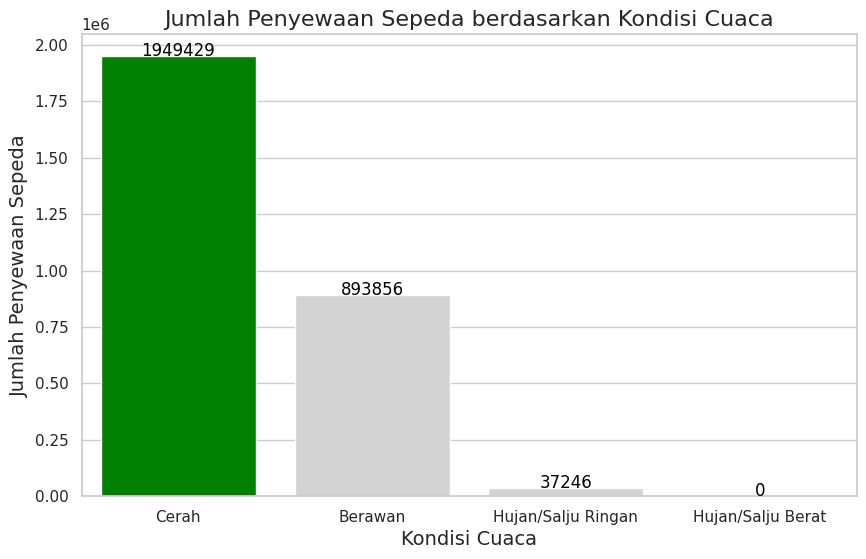

In [804]:
# Set the style and context for the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Visualize the number of bike rentals for each weather condition
ax = sns.barplot(x='weathersit', y='cnt', data=day_df_filtered, estimator=sum, errorbar=None, color='lightgray')
sns.barplot(x='weathersit', y='cnt', data={'weathersit': [4], 'cnt': [0]}, estimator=sum, ax=ax)

# Add title and labels
plt.title('Jumlah Penyewaan Sepeda berdasarkan Kondisi Cuaca', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=14)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=14)

# Add value annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black')

# Set x-axis labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berawan', 'Hujan/Salju Ringan', 'Hujan/Salju Berat'])

# Set color only for the highest bar
max_value = max([p.get_height() for p in ax.patches])
for p in ax.patches:
    if p.get_height() == max_value:
        p.set_facecolor('green')  # Change the color of the highest bar

# Show the plot
plt.show()

Berdasarkan grafik di atas, terlihat bahwa jumlah penyewaan sepeda mencapai puncak tertingginya ketika kondisi cuacanya **Cerah**. Sebaliknya, jumlah penyewaan sepeda mencapai titik terendah, dengan nilai 0, saat kondisi cuaca adalah **Hujan/Salju Berat**.

### Pertanyaan 2:

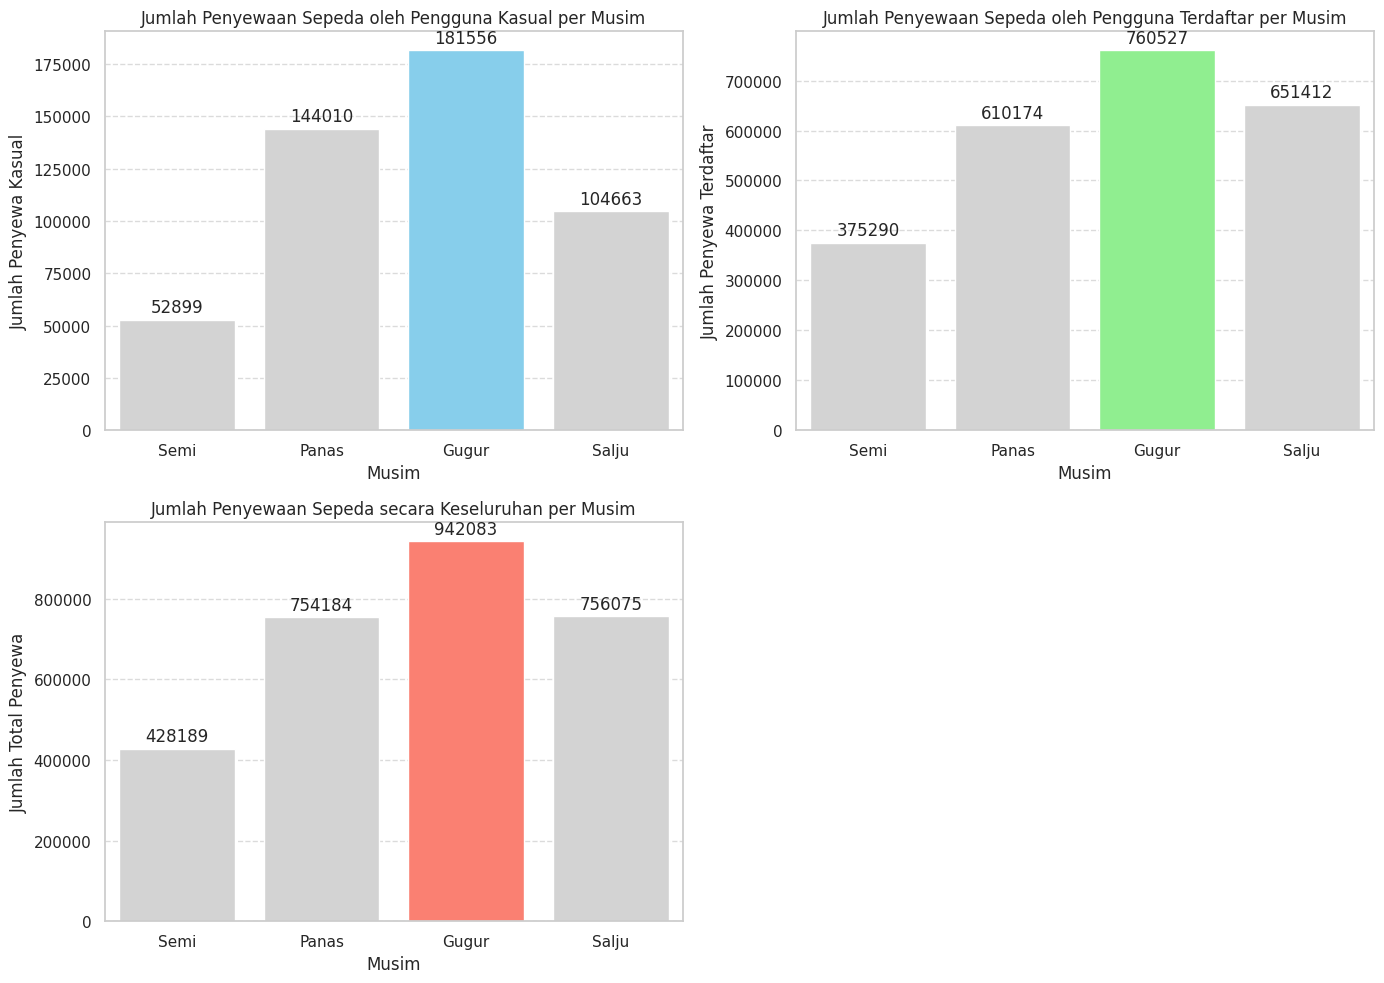

In [805]:
# Set style
sns.set(style="whitegrid")

# Visualization
plt.figure(figsize=(14, 10))

# Average for each season
seasonal_analysis = day_df_filtered.groupby('season')[['casual', 'registered', 'cnt']].sum()

# Subplot 1
plt.subplot(2, 2, 1)
casual_plot = sns.barplot(x=seasonal_analysis.index, y=seasonal_analysis['casual'], color='lightgray')
plt.title('Jumlah Penyewaan Sepeda oleh Pengguna Kasual per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa Kasual')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add values on top of each bar
for p in casual_plot.patches:
    if p.get_height() == seasonal_analysis['casual'].max():
        p.set_facecolor('skyblue')
    casual_plot.annotate(f'{p.get_height():.0f}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')
# Set x-axis labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['Semi', 'Panas', 'Gugur', 'Salju'])

# Subplot 2
plt.subplot(2, 2, 2)
registered_plot = sns.barplot(x=seasonal_analysis.index, y=seasonal_analysis['registered'], color='lightgray')
plt.title('Jumlah Penyewaan Sepeda oleh Pengguna Terdaftar per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa Terdaftar')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add values on top of each bar
for p in registered_plot.patches:
    if p.get_height() == seasonal_analysis['registered'].max():
        p.set_facecolor('lightgreen')
    registered_plot.annotate(f'{p.get_height():.0f}',
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha = 'center', va = 'center',
                             xytext = (0, 9),
                             textcoords = 'offset points')
# Set x-axis labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['Semi', 'Panas', 'Gugur', 'Salju'])

# Subplot 3
plt.subplot(2, 2, 3)
cnt_plot = sns.barplot(x=seasonal_analysis.index, y=seasonal_analysis['cnt'], color='lightgray')
plt.title('Jumlah Penyewaan Sepeda secara Keseluruhan per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Total Penyewa')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add values on top of each bar
for p in cnt_plot.patches:
    if p.get_height() == seasonal_analysis['cnt'].max():
        p.set_facecolor('salmon')
    cnt_plot.annotate(f'{p.get_height():.0f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
# Set x-axis labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['Semi', 'Panas', 'Gugur', 'Salju'])

# Adjust layout for better spacing
plt.tight_layout()


# Show the plot
plt.show()


Dari dua grafik, yaitu *Jumlah Penyewaan Sepeda oleh Pengguna Terdaftar per Musim* dan *Jumlah Penyewaan Sepeda secara Keseluruhan per Musim*, jumlah penyewa sepeda secara keseluruhan mencapai puncaknya pada musim **Gugur**, diikuti oleh musim **Salju**, musim **Panas**, dan musim **Semi**. Hal ini sedikit berbeda dengan grafik *Jumlah Penyewaan Sepeda oleh Pengguna Kasual per Musim* yang menunjukkan jumlah penyewaan sepeda pada musim **Panas** yang lebih tinggi dari jumlah penyewaan sepeda pada musim **Salju**.

### Pertanyaan 3:

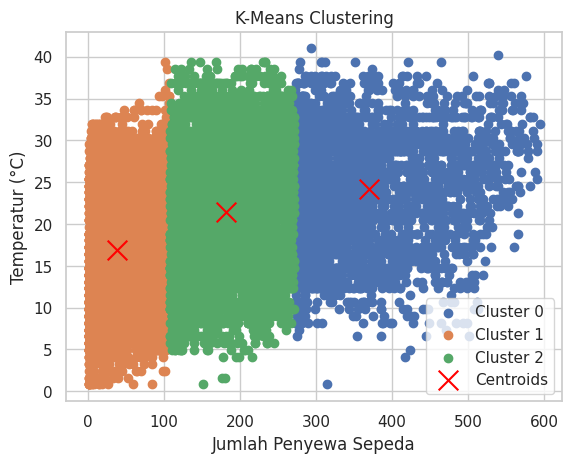

In [806]:
# Denormalize the temperature value
hour_df_filtered['temp'] *= 41

# Load only the necessary columns
columns_to_load = ['cnt', 'temp']

# Select the number of clusters (k)
k = 3

# Select random initial centroids
centroids = hour_df_filtered[columns_to_load].sample(n=k, random_state=42).values

# Perform k-means clustering
for _ in range(10):  # Number of iterations
    # Calculate distances to centroids
    distances = np.vstack([np.linalg.norm(hour_df_filtered[columns_to_load].values - centroid, axis=1) for centroid in centroids])

    # Assign each point to the closest centroid
    labels = np.argmin(distances, axis=0)

    # Update centroids
    centroids = np.array([hour_df_filtered[columns_to_load][labels == i].mean(axis=0) for i in range(k)])

# Add cluster labels to the DataFrame
hour_df_filtered['cluster'] = labels

# Visualize the clusters
for cluster in range(k):
    cluster_data = hour_df_filtered[hour_df_filtered['cluster'] == cluster]
    plt.scatter(cluster_data['cnt'], cluster_data['temp'], label=f'Cluster {cluster}')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Centroids')  # Adjust indices for temp and hum
plt.xlabel('Jumlah Penyewa Sepeda')
plt.ylabel('Temperatur (°C)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

Grafik menunjukkan bahwa terdapat hubungan antara temperatur dan jumlah penyewa sepeda. Orang lebih cenderung menyewa sepeda ketika temperaturnya menengah atau tinggi.

## Conclusion

- ### Kesimpulan pertanyaan 1

  Berdasarkan grafik "Jumlah Penyewaan Sepeda berdasarkan Kondisi Cuaca", didapatkan hasil sebagai berikut.
  * **Cerah**: Penyewaan sepeda paling banyak terjadi saat cuaca cerah, dengan total sebanyak 1.949.429 penyewaan. Ini menunjukkan bahwa cuaca cerah sangat mendukung aktivitas bersepeda.
  * **Berawan**: Saat cuaca berawan, jumlah penyewaan sepeda menurun menjadi 893.856. Meskipun lebih rendah dibandingkan cuaca cerah, angka ini masih menunjukkan bahwa cukup banyak orang yang memilih untuk bersepeda meskipun cuaca tidak sepenuhnya cerah.
  * **Hujan/Salju Ringan**: Saat cuaca berubah menjadi hujan atau salju ringan, jumlah penyewaan sepeda turun drastis menjadi 37,246. Ini menunjukkan bahwa cuaca buruk dapat mengurangi minat orang untuk bersepeda.
  * **Hujan/Salju Berat**: Saat hujan atau salju berat, tidak ada penyewaan sepeda yang tercatat sama sekali. Ini menunjukkan bahwa cuaca ekstrem seperti ini dapat menghentikan aktivitas bersepeda sepenuhnya.

  Dengan demikian, dapat disimpulkan bahwa cuaca memiliki pengaruh yang signifikan terhadap persebaran jumlah penyewa sepeda. Cuaca cerah mendukung aktivitas bersepeda, sementara cuaca buruk dapat mengurangi atau bahkan menghentikan aktivitas tersebut.

- ### Kesimpulan pertanyaan 2

  Berdasarkan analisis data penyewaan sepeda, kita dapat menyimpulkan pengaruh musim terhadap jumlah penyewa sepeda sebagai berikut:
  * **Pengguna Kasual**: Pada musim gugur, jumlah penyewaan kasual mencapai puncaknya. Musim panas dan salju juga menunjukkan jumlah penyewaan yang tinggi, sedangkan musim semi memiliki jumlah penyewaan kasual yang lebih rendah.
  * **Pengguna Terdaftar**: Pada musim gugur, jumlah penyewaan terdaftar tertinggi terjadi, dan kemudian diikuti oleh musim salju dan panas. Sedangkan musim semi memiliki jumlah penyewaan terdaftar yang lebih rendah.
  * **Total Keduanya**: Secara keseluruhan, jumlah penyewaan sepeda paling tinggi terjadi pada musim gugur, kemudian diikuti oleh musim salju dan panas, baru kemudian musim semi. Ini sama seperti data pada **Pengguna Terdaftar**.

  Jadi, musim mempengaruhi pola penyewaan sepeda, dengan musim gugur menjadi puncak aktivitas penyewaan.

- ### Kesimpulan pertanyaan 3

  Berdasarkan grafik "K-Means Clustering", kita dapat menyimpulkan bahwa terdapat hubungan positif antara temperatur dan jumlah penyewa sepeda. Ketika temperatur meningkat, jumlah penyewa sepeda juga cenderung meningkat. Grafik ini memperlihatkan tiga kluster data yang menunjukkan pola penyewaan pada suhu yang berbeda:
  * **Kluster 1** (Oranye): Menunjukkan jumlah penyewaan sepeda yang lebih rendah pada temperatur lebih rendah.
  * **Kluster 2** (Hijau): Menunjukkan jumlah penyewaan sepeda sedang pada temperatur sedang.
  * **Kluster 0** (Biru): Menunjukkan peningkatan signifikan dalam jumlah penyewaan sepeda pada temperatur lebih tinggi.

  Secara umum, ketika suhu naik, aktivitas penyewaan sepeda juga meningkat.